In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files
files.upload()

In [ ]:
data = pd.read_csv('Housing.csv')
print(data.columns)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [ ]:
data.head(10)

In [ ]:
print("dimension of housing data: {}".format(data.shape))

dimension of housing data: (545, 13)


In [ ]:
data.info()

In [ ]:
data.isnull().sum() # No null values#
data.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

 **Data Preparation**

a) YES/NO categories

It is seen that there are some columns with categorical values like 'YES' or 'NO'. We need to change them to 0 and *1*

b) drop columns

In [ ]:
#first fetch all the categorical columns with Yes and NO
categorical =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
#write a function to change yes to 1 and no to 0
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# now replace yes and no with 1 and 0 in our dataset
data[categorical] = data[categorical].apply(binary_map)

In [ ]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [ ]:
data.drop(['furnishingstatus'], axis = 1, inplace = True) #drop the old column from the dataset
data.head()

**VISUALISING THE DATA**

After successfully loading the data, our next step is to visualize this data. Data visualization is an important part in the role of a data scientist.

It is recommended to visualize the data so as to find any correlation between the different parameters.

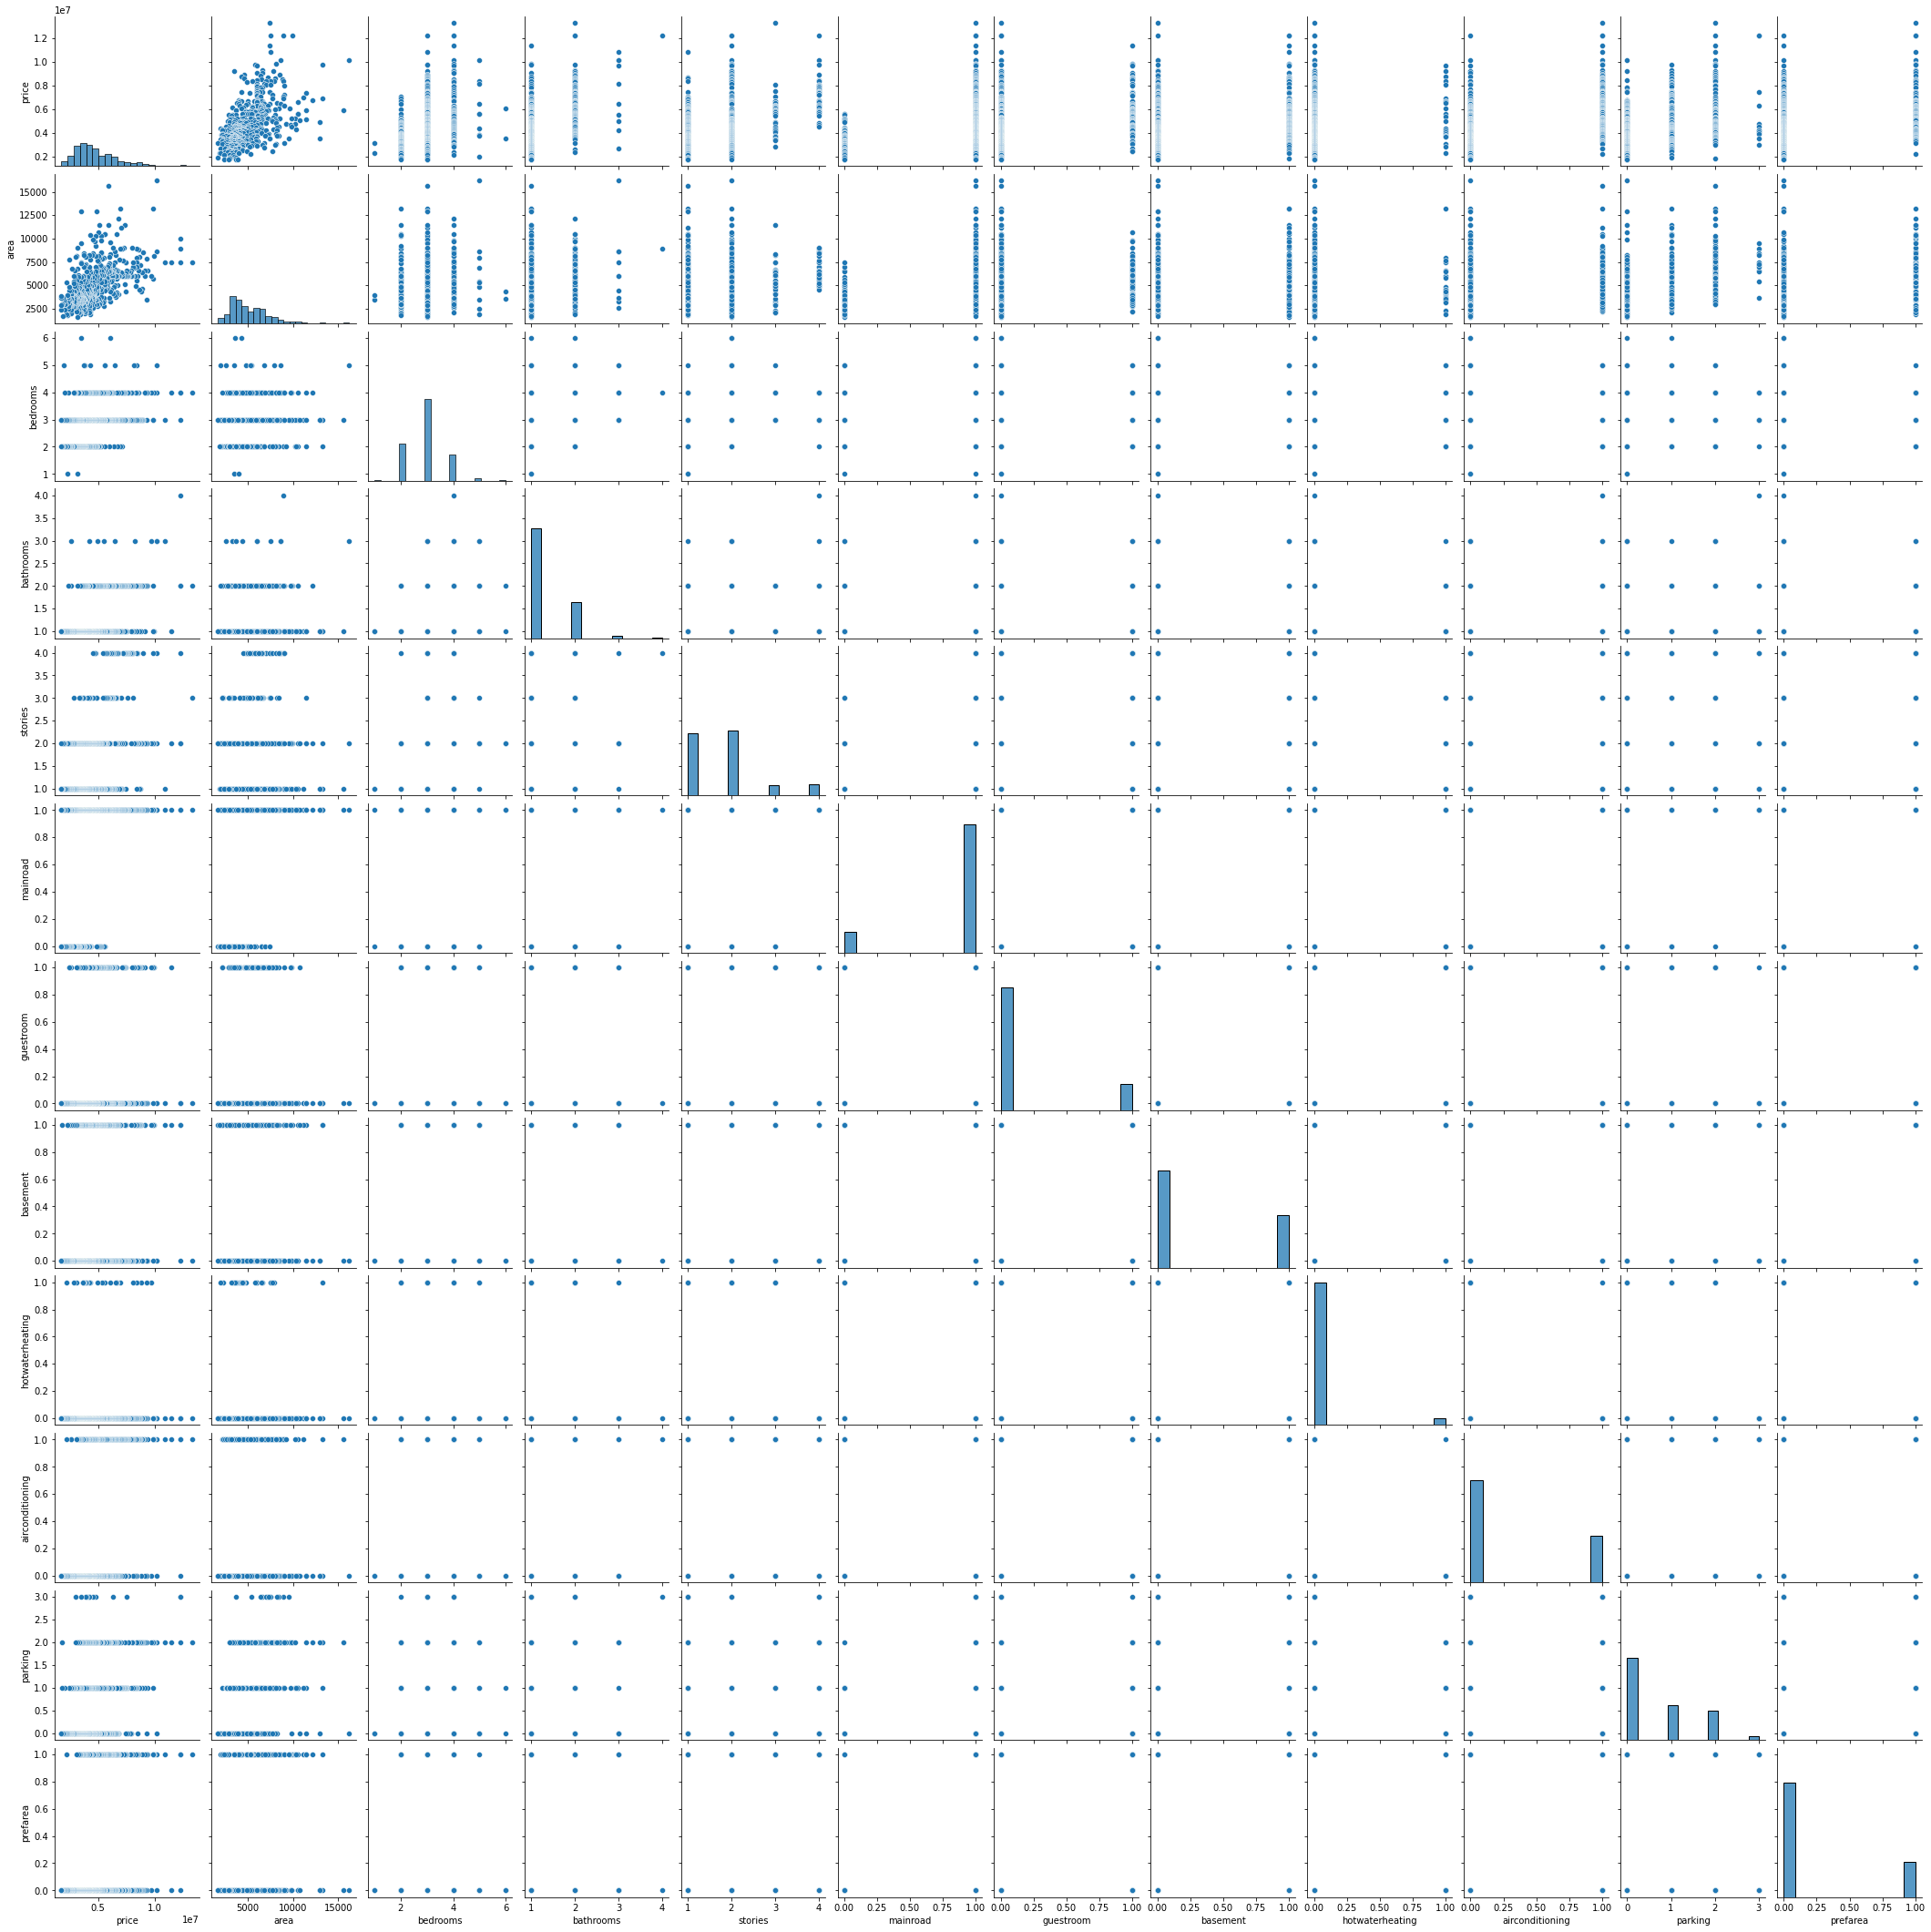

In [ ]:
import seaborn as sns

sns.pairplot(data)
plt.show()

In [ ]:
plt.figure()
sns.heatmap(data.corr(),cmap='coolwarm')
plt.show()

In [ ]:
print(data.corr())

                    price      area  bedrooms  bathrooms   stories  mainroad  \
price            1.000000  0.535997  0.366494   0.517545  0.420712  0.296898   
area             0.535997  1.000000  0.151858   0.193820  0.083996  0.288874   
bedrooms         0.366494  0.151858  1.000000   0.373930  0.408564 -0.012033   
bathrooms        0.517545  0.193820  0.373930   1.000000  0.326165  0.042398   
stories          0.420712  0.083996  0.408564   0.326165  1.000000  0.121706   
mainroad         0.296898  0.288874 -0.012033   0.042398  0.121706  1.000000   
guestroom        0.255517  0.140297  0.080549   0.126469  0.043538  0.092337   
basement         0.187057  0.047417  0.097312   0.102106 -0.172394  0.044002   
hotwaterheating  0.093073 -0.009229  0.046049   0.067159  0.018847 -0.011781   
airconditioning  0.452954  0.222393  0.160603   0.186915  0.293602  0.105423   
parking          0.384394  0.352980  0.139270   0.177496  0.045547  0.204433   
prefarea         0.329777  0.234779  0.0

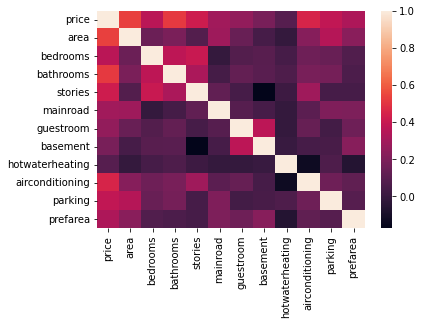

In [ ]:
dataplot = sns.heatmap(data.corr())

**STEP 3: FEATURE ENGINEERING**

While visualizing our data, we found that there is a strong correlation between the two parameters: area and price. 

Thereby we will be using these parameters for building our model.

reshape(-1, 1) if your data has a single feature or X. 

In [ ]:
#Selecting the required parameters
area = data['area']
price = data['price']
X = np.array(area).reshape(-1,1)
y = np.array(price)

In [ ]:
print(y)

In [ ]:
print(X)

**Split data into Training and Testing data**

In [ ]:
from sklearn import datasets,linear_model,metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)


In [ ]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [ ]:
print(y_train)

**Train Model**

In [ ]:
# Create linear regression object

lin_reg=linear_model.LinearRegression()

In [ ]:
# Train the model using trai and test data

lin_reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Regression coefficients

print('\n Coefficients are:\n',lin_reg.coef_)



 Coefficients are:
 [[475.26784571]]


In [ ]:
# Intecept

print('\nIntercept : ',lin_reg.intercept_)


Intercept :  [2329244.91349515]


In [ ]:
# variance score: 1 means perfect prediction

print('Variance score: ',lin_reg.score(X_test, y_test))


In [ ]:
print(X_test)

In [ ]:
# Predict values for X_test data

predict = lin_reg.predict(X_test)
predictions = predict.reshape(-1,1)
print(predictions)   #  Predicted 20% data of price



In [ ]:
# Original data of X_test

actual = y_test  # original 20% test data of price
print(actual)

Text(0, 0.5, 'Predicted')

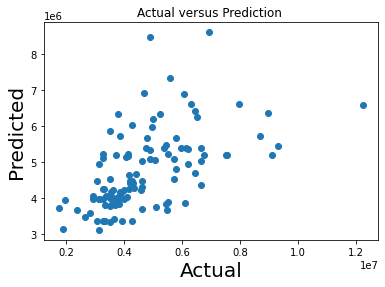

In [ ]:
#using scatter plot compare the actual and predicted data
fig = plt.figure()
plt.scatter(actual,predictions)
plt.title('Actual versus Prediction ')
plt.xlabel('Actual', fontsize=20)                         
plt.ylabel('Predicted', fontsize=20)      

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Predicted')

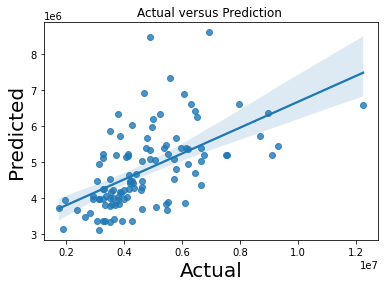

In [ ]:
#trying the same with a reg plot(optonal)
sns.regplot(actual,predictions)
plt.title('Actual versus Prediction ')
plt.xlabel('Actual', fontsize=20)                         
plt.ylabel('Predicted', fontsize=20)   

In [ ]:
# Mean Squared Erroe

print("Mean squared error: %.2f\n"
      % mean_squared_error(actual, predictions))

Mean squared error: 1997672371756.09

